<a href="https://colab.research.google.com/github/yossun/Kasus_Covid_diBanten_Indonesia/blob/main/Kasus_Covid19_di_Banten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pencegahancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(pencegahancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [ ]:
print(resp)

<Response [200]>


In [ ]:
print(resp.headers)


{'Server': 'nginx', 'Date': 'Mon, 06 Dec 2021 13:50:27 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 06 Dec 2021 13:45:24 GMT', 'ETag': 'W/"61ae13f4-3d009"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [3]:
cov_id_raw  = resp.json()

In [4]:
print('Length of covid_raw : %d.' %len(cov_id_raw))
print('Komponen covid_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of covid_raw : 2.
Komponen covid_raw  : dict_keys(['data', 'update']).


In [5]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-12-07
Jumlah penambahan kasus sembuh : 420
Jumlah penambahan kasus meninggal : 17
Jumlah total kasus positif hingga saat ini : 4258076
Jumlah total kasus meninggal hingga saat ini: 143893


**Memahami Kasus COVID-19 di Banten**

In [7]:
import requests
resp_banten = requests.get('https://data.covid19.go.id/public/api/prov_detail_BANTEN.json')
cov_banten_raw = resp_banten.json()

In [8]:
print('Nama-nama elemen utama:\n', cov_banten_raw.keys())
print('\nJumlah total kasus COVID-19 di Banten : %d' %cov_banten_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Banten : %f.2%%' %cov_banten_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Banten : %f.2%%' %cov_banten_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Banten : 132711
Persentase kematian akibat COVID-19 di Banten : 2.026207.2%
Persentase tingkat kesembuhan dari COVID-19 di Banten : 97.896934.2%


In [9]:
import numpy as np
import pandas as pd
cov_banten = pd.DataFrame(cov_banten_raw['list_perkembangan'])
print('Info cov_banten:\n', cov_banten.info())
print('\nLima data teratas cov_banten:\n', cov_banten.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       640 non-null    int64
 1   KASUS                         640 non-null    int64
 2   MENINGGAL                     640 non-null    int64
 3   SEMBUH                        640 non-null    int64
 4   DIRAWAT_OR_ISOLASI            640 non-null    int64
 5   AKUMULASI_KASUS               640 non-null    int64
 6   AKUMULASI_SEMBUH              640 non-null    int64
 7   AKUMULASI_MENINGGAL           640 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  640 non-null    int64
dtypes: int64(9)
memory usage: 45.1 KB
Info cov_banten:
 None

Lima data teratas cov_banten:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583452800000      1  ...                    0                             0
1  158353920000

In [ ]:
cov_banten.shape

(642, 9)

In [21]:
cov_banten_tidy = (cov_banten.drop(columns=[item for item in cov_banten.columns
															if item.startswith('AKUMULASI')
															or item.startswith('DIRAWAT')]).rename(columns=str.lower).rename(columns={'kasus': 'kasus_baru'}) )


In [22]:
cov_banten_tidy['tanggal'] = pd.to_datetime(cov_banten_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_banten_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-06           1          0       1
1 2020-03-07           0          0       0
2 2020-03-08           1          0       3
3 2020-03-09           0          0       0
4 2020-03-10           0          0       8


<Figure size 432x288 with 0 Axes>

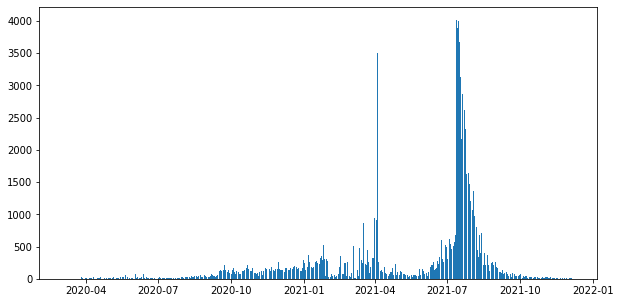

In [25]:
import matplotlib.pyplot as plt
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_banten_tidy, x='tanggal', height='kasus_baru')
plt.show()

**Informasi pada Grafik**

<Figure size 432x288 with 0 Axes>

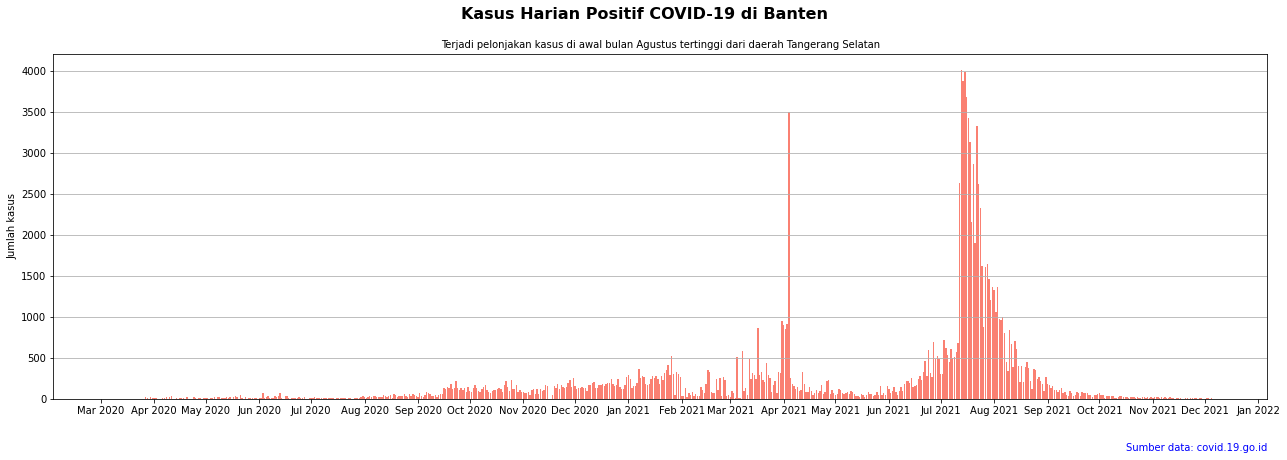

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(data=cov_banten_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Banten',
y=1.05, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Agustus tertinggi dari daerah Tangerang Selatan',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.15, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Grafik untuk Kasus Sembuh**

<Figure size 432x288 with 0 Axes>

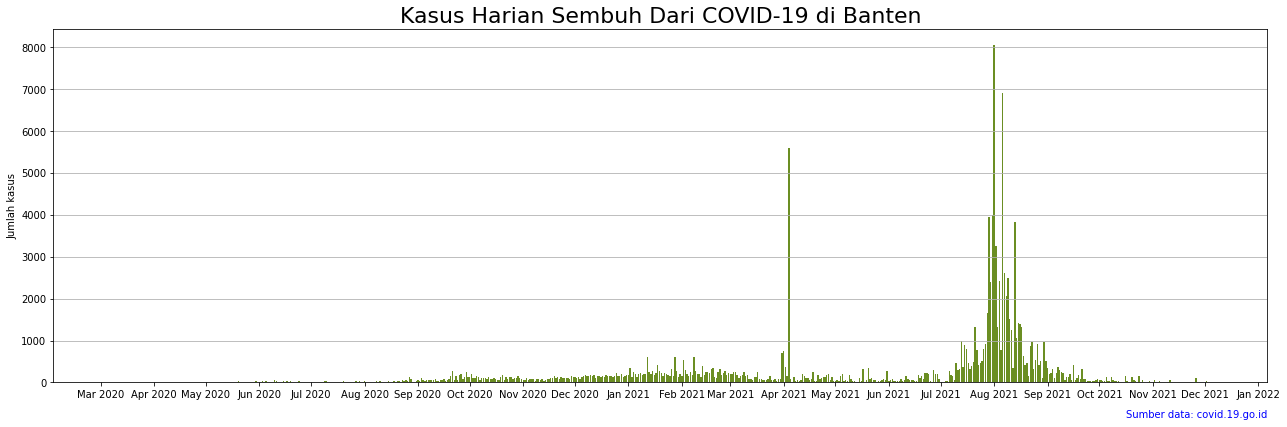

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(data=cov_banten_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Banten',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Grafik Kasus Harian Meninggal di Banten**

<Figure size 432x288 with 0 Axes>

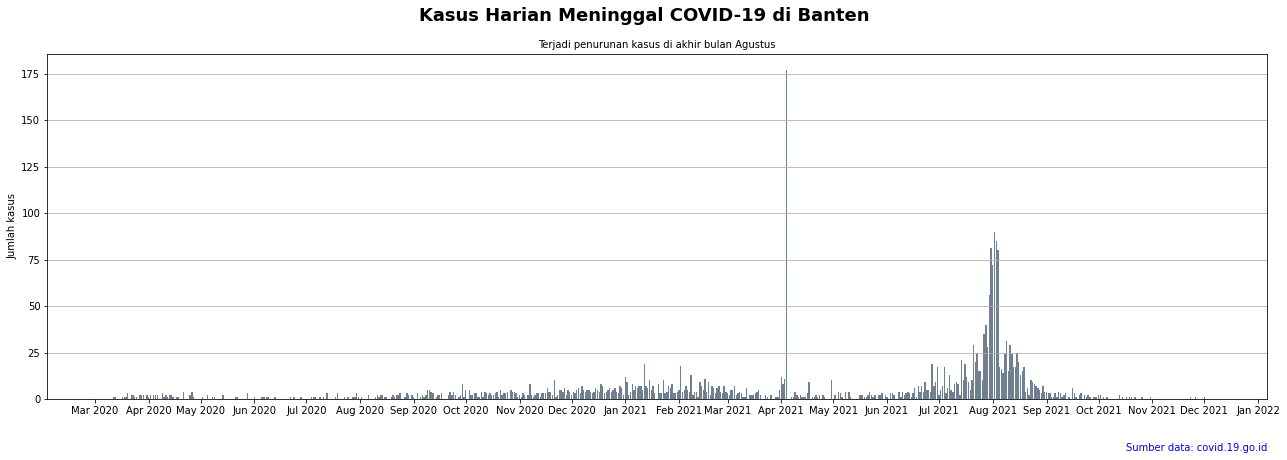

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(data=cov_banten_tidy, x='tanggal', height='meninggal', color='slategrey')
fig.suptitle('Kasus Harian Meninggal COVID-19 di Banten',
y=1.05, fontsize=18, fontweight='bold', ha='center')
ax.set_title('Terjadi penurunan kasus di akhir bulan Agustus',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.15, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [52]:
cov_banten_pekanan = (cov_banten_tidy.set_index('tanggal')['kasus_baru']
					  .resample('W')
					  .sum()
					  .reset_index()
					  .rename(columns={'kasus_baru': 'jumlah'})
)
cov_banten_pekanan['tahun'] = cov_banten_pekanan['tanggal'].apply(lambda x: x.year)
cov_banten_pekanan['pekan_ke'] = cov_banten_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_banten_pekanan = cov_banten_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_banten_pekanan:')
print(cov_banten_pekanan.info())
print('\nLima data terawal cov_banten_pekanan:\n', cov_banten_pekanan.head())

Info cov_banten_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     92 non-null     int64
 1   pekan_ke  92 non-null     int64
 2   jumlah    92 non-null     int64
dtypes: int64(3)
memory usage: 2.3 KB
None

Lima data terawal cov_banten_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       2
1   2020        11       3
2   2020        12       1
3   2020        13      37
4   2020        14      65


In [53]:
cov_banten_pekanan['jumlah_pekanlalu'] = cov_banten_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_banten_pekanan['lebih_baik'] = cov_banten_pekanan['jumlah'] < cov_banten_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_banten_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       2                 0       False
1   2020        11       3                 2       False
2   2020        12       1                 3        True
3   2020        13      37                 1       False
4   2020        14      65                37       False
5   2020        15      94                65       False
6   2020        16      50                94        True
7   2020        17      70                50       False
8   2020        18      63                70        True
9   2020        19     107                63       False


<Figure size 432x288 with 0 Axes>

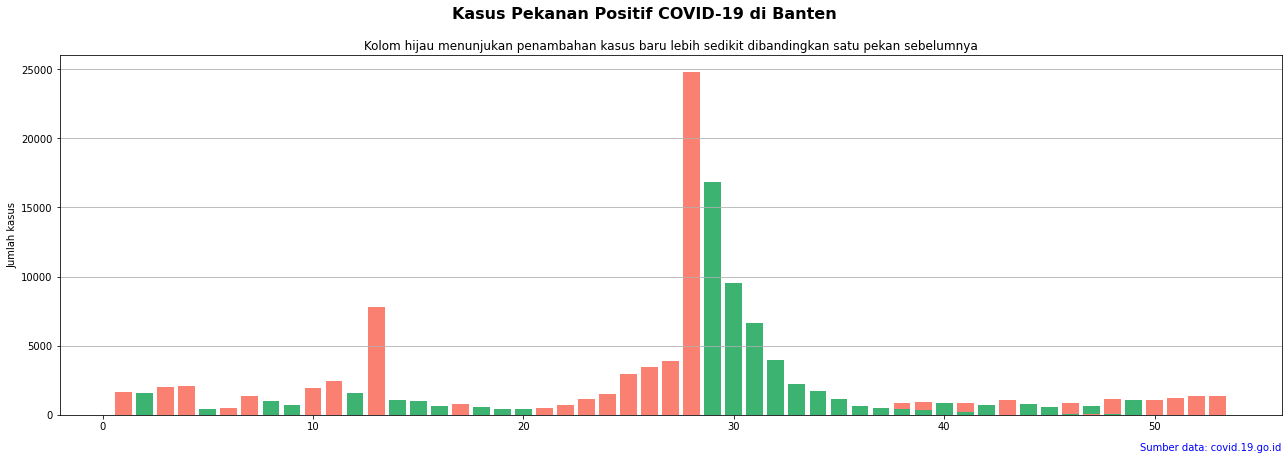

In [56]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(data=cov_banten_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_banten_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Banten',
y=1.05, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Pola dan Dinamika**

In [57]:
cov_banten_akumulasi = cov_banten_tidy[['tanggal']].copy()
cov_banten_akumulasi['akumulasi_aktif'] = (cov_banten_tidy['kasus_baru'] - cov_banten_tidy['sembuh'] - cov_banten_tidy['meninggal']).cumsum()
cov_banten_akumulasi['akumulasi_sembuh'] = cov_banten_tidy['sembuh'].cumsum()
cov_banten_akumulasi['akumulasi_meninggal'] = cov_banten_tidy['meninggal'].cumsum()
cov_banten_akumulasi.tail()


,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
635,2021-12-01,195,129798,2684
636,2021-12-02,186,129823,2684
637,2021-12-03,190,129825,2684
638,2021-12-04,182,129838,2684
639,2021-12-05,185,129842,2684


<Figure size 432x288 with 0 Axes>

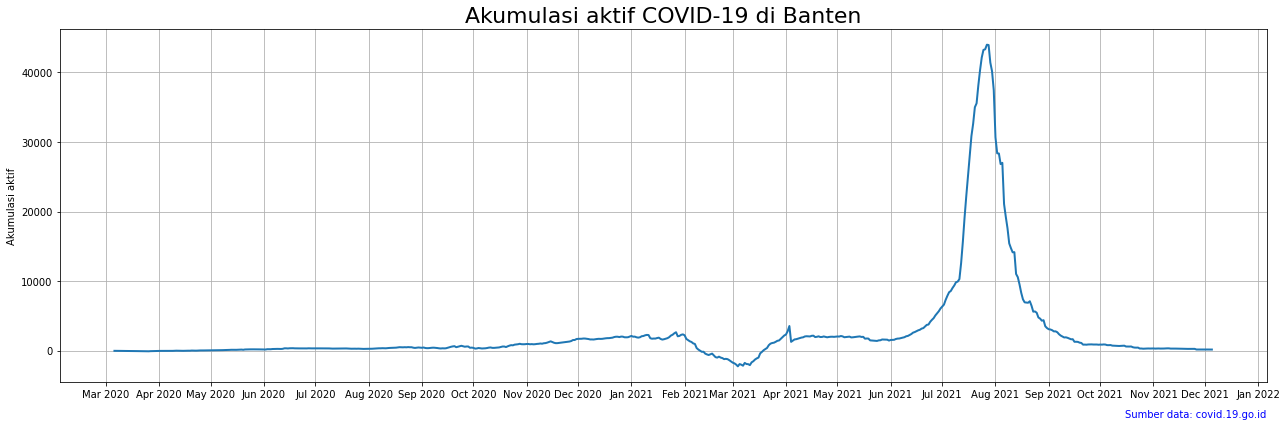

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(18,6))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_banten_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Banten',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

**Tahap Terakhir Dinamika Covid di Banten**

<Figure size 432x288 with 0 Axes>

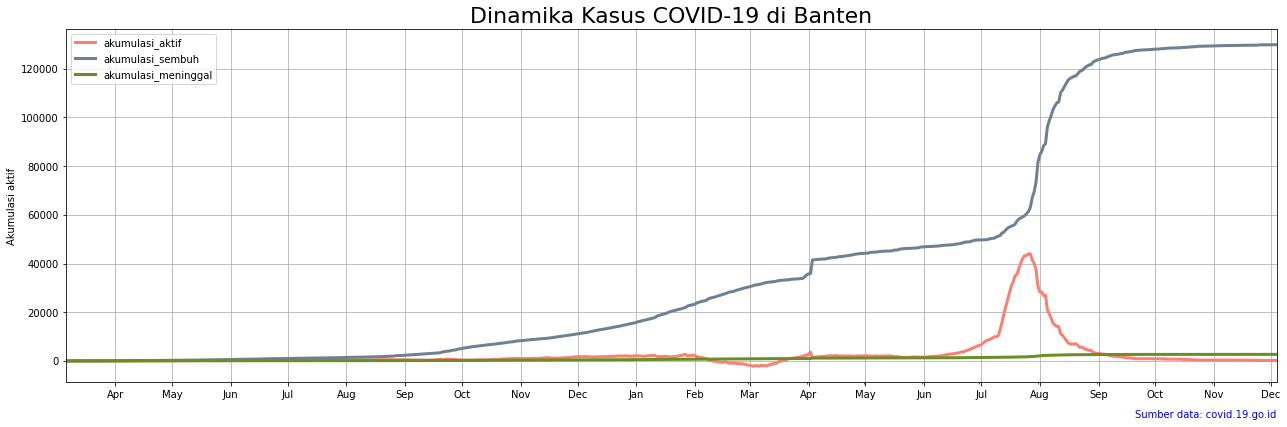

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(18,6))
cov_banten_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Banten',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()